In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/drive/MyDrive/INTERNSHIP_VOIS/Netflix Dataset.csv')
data


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [26]:
data.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


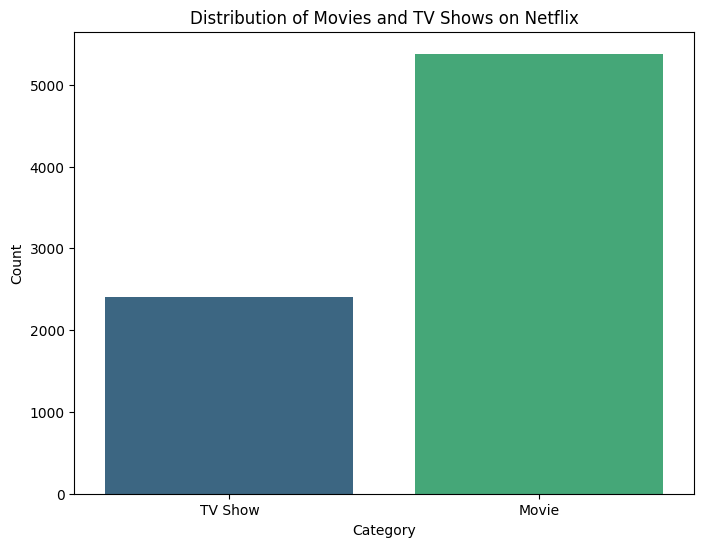

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Category', hue='Category', palette='viridis', legend=False)
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Task
Analyze the Netflix dataset "netflix_titles.csv" to identify content trends over the years, focusing on the distribution of Movies vs. TV Shows, genres, and country contributions, and provide strategic recommendations based on the findings.

## Data preparation

### Subtask:
Handle missing values in relevant columns ('Release_Date', 'Country', 'Rating', 'Director', 'Cast') and ensure 'Release_Date' is in datetime format.


**Reasoning**:
Fill missing values in specified columns with 'Unknown' and drop rows with missing 'Release_Date'.



**Reasoning**:
The previous attempt to convert 'Release_Date' to datetime failed due to inconsistent format. Use the 'mixed' format to allow pandas to infer the format for each element.



In [28]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], format='mixed')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      5401 non-null   object        
 4   Cast          7071 non-null   object        
 5   Country       7282 non-null   object        
 6   Release_Date  7779 non-null   datetime64[ns]
 7   Rating        7782 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 669.5+ KB


## Content distribution by year

### Subtask:
Analyze the number of movies and TV shows released each year.


**Reasoning**:
Extract the year from the 'Release_Date' column and store it in a new column named 'Release_Year', then group by 'Release_Year' to count total releases per year, and group by both 'Release_Year' and 'Category' to count movies and TV shows per year.



In [29]:
data['Release_Year'] = data['Release_Date'].dt.year
yearly_releases = data.groupby('Release_Year').size().reset_index(name='Total Releases')
yearly_category_releases = data.groupby(['Release_Year', 'Category']).size().reset_index(name='Count')

**Reasoning**:
Plot the total number of releases per year using the 'yearly_releases' dataframe, and plot the number of movies and TV shows released each year on the same plot using the 'yearly_category_releases' dataframe to compare their trends.



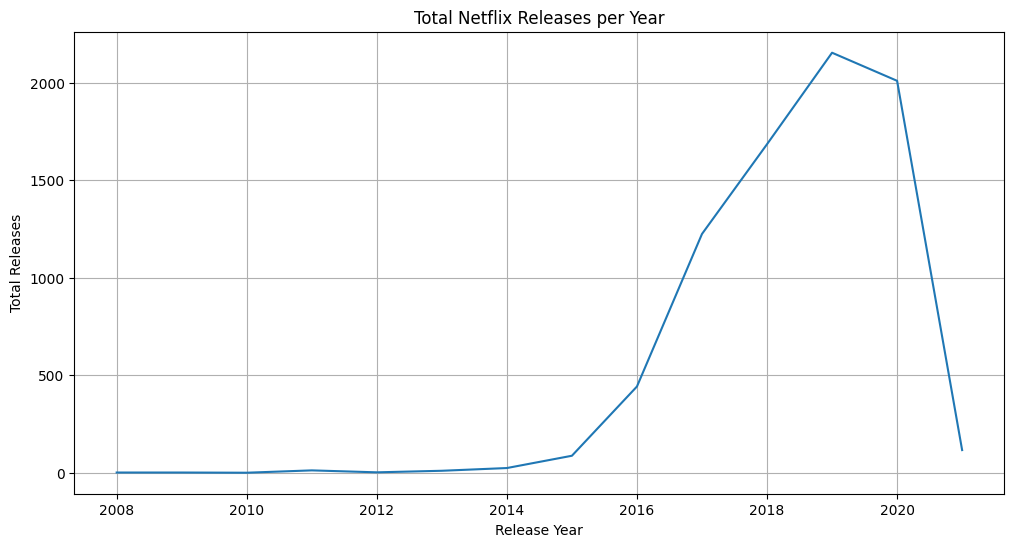

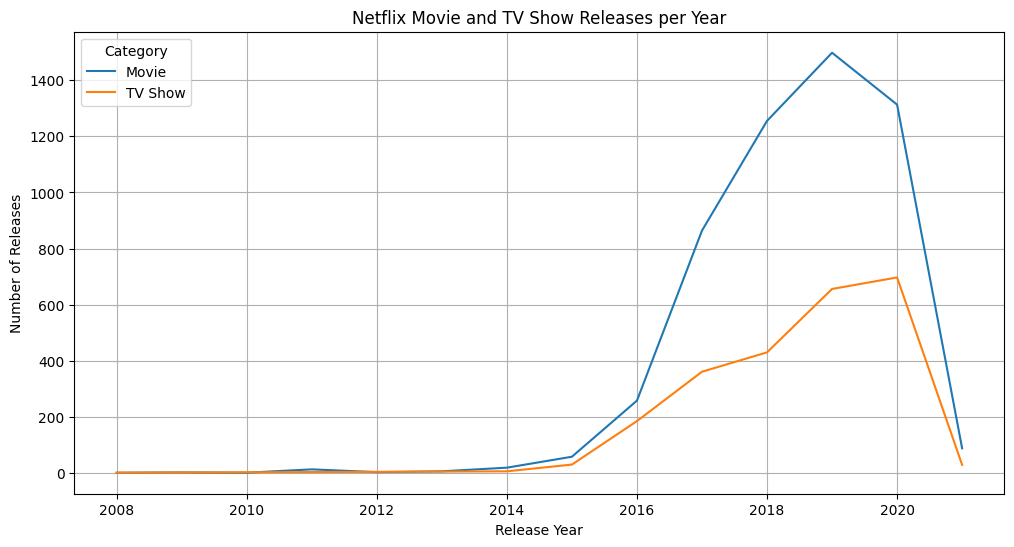

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_releases, x='Release_Year', y='Total Releases')
plt.title('Total Netflix Releases per Year')
plt.xlabel('Release Year')
plt.ylabel('Total Releases')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_category_releases, x='Release_Year', y='Count', hue='Category')
plt.title('Netflix Movie and TV Show Releases per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

## Content distribution by genre

### Subtask:
Explore the distribution of content across different genres and how this has changed over time.


**Reasoning**:
Split the 'Type' column into individual genres, melt the DataFrame to have a 'Genre' column, count the occurrences of each genre, identify the top 10 genres, and visualize their distribution using a bar plot.



/tmp/ipython-input-1609517756.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Genre', y='Count', palette='viridis')


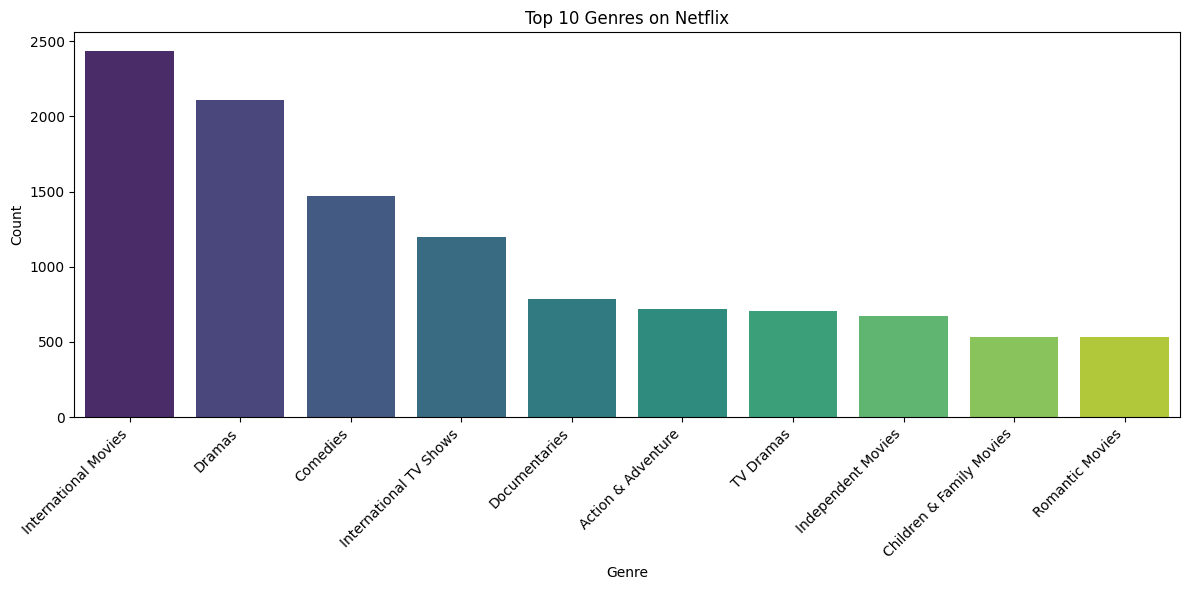

In [31]:
genre_df = data['Type'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('Genre')
genre_df = genre_df[genre_df['Genre'].str.strip() != '']
genre_df['Genre'] = genre_df['Genre'].str.strip()
genre_counts = genre_df['Genre'].value_counts().reset_index(name='Count')
top_genres = genre_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x='Genre', y='Count', palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Analyze the trend of the top genres over the years by grouping by 'Release_Year' and the new 'Genre' column, counting the occurrences, and visualizing the yearly trend of the top genres using a line plot.



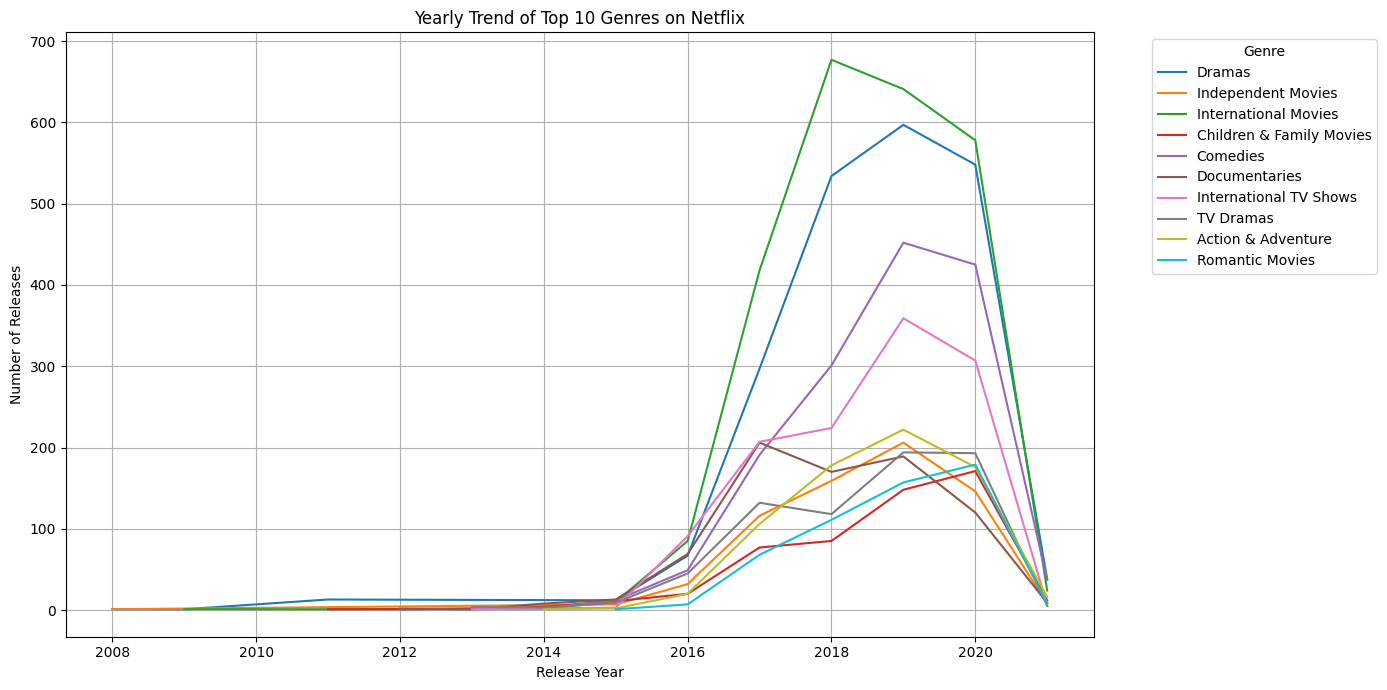

In [32]:
data_with_genres = data.join(genre_df, how='inner')
top_genre_names = top_genres['Genre'].tolist()
yearly_genre_trend = data_with_genres[data_with_genres['Genre'].isin(top_genre_names)].groupby(['Release_Year', 'Genre']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_genre_trend, x='Release_Year', y='Count', hue='Genre')
plt.title('Yearly Trend of Top 10 Genres on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Content distribution by country

### Subtask:
Identify the countries producing the most content and analyze the trend of content production from different countries over the years.


**Reasoning**:
Count the occurrences of each country, identify the top 10, filter the data, group by year and country, and plot the yearly trend for the top countries.



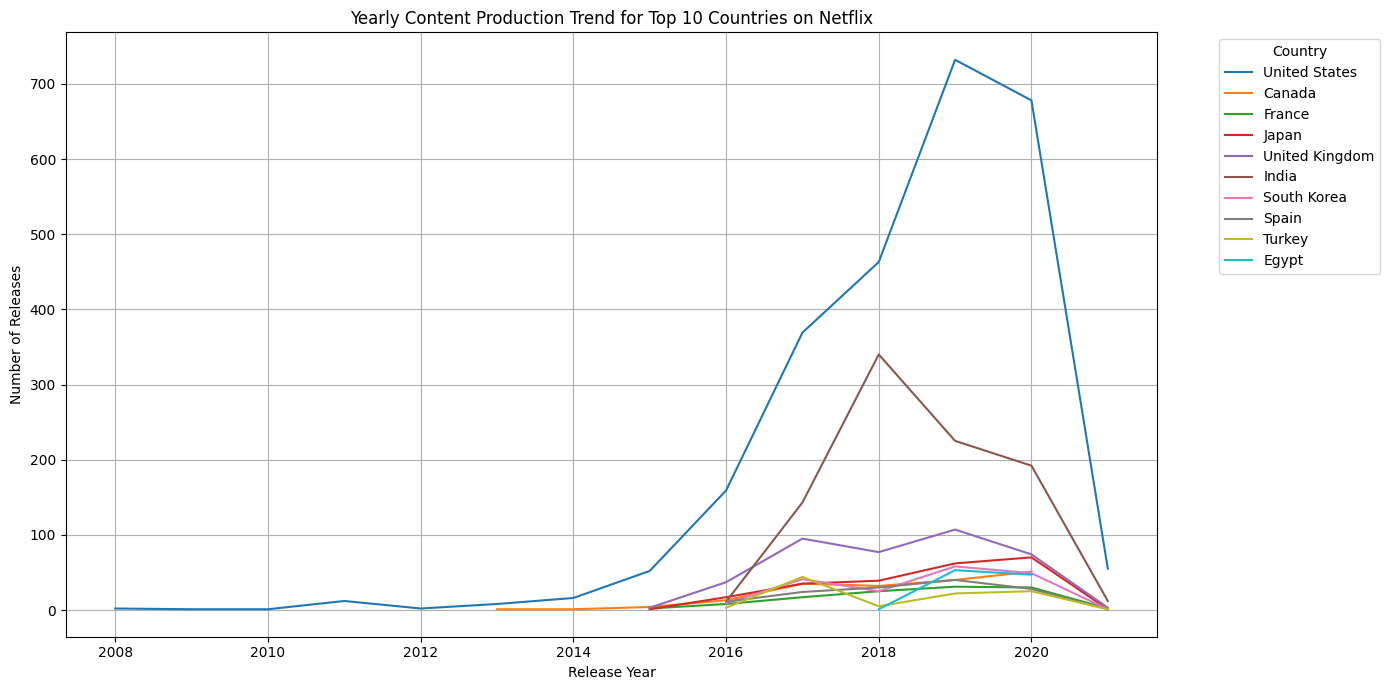

In [33]:
country_counts = data['Country'].value_counts().reset_index(name='Count')
country_counts.columns = ['Country', 'Count']
top_10_countries = country_counts.head(10)['Country'].tolist()

data_top_countries = data[data['Country'].isin(top_10_countries)]

yearly_country_trend = data_top_countries.groupby(['Release_Year', 'Country']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_country_trend, x='Release_Year', y='Count', hue='Country')
plt.title('Yearly Content Production Trend for Top 10 Countries on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analyze ratings and durations

### Subtask:
Investigate the distribution of ratings and durations for both movies and TV shows.


**Reasoning**:
Create a count plot to visualize the distribution of ratings across all content.



/tmp/ipython-input-3832593552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Rating', order=data['Rating'].value_counts().index, palette='viridis')


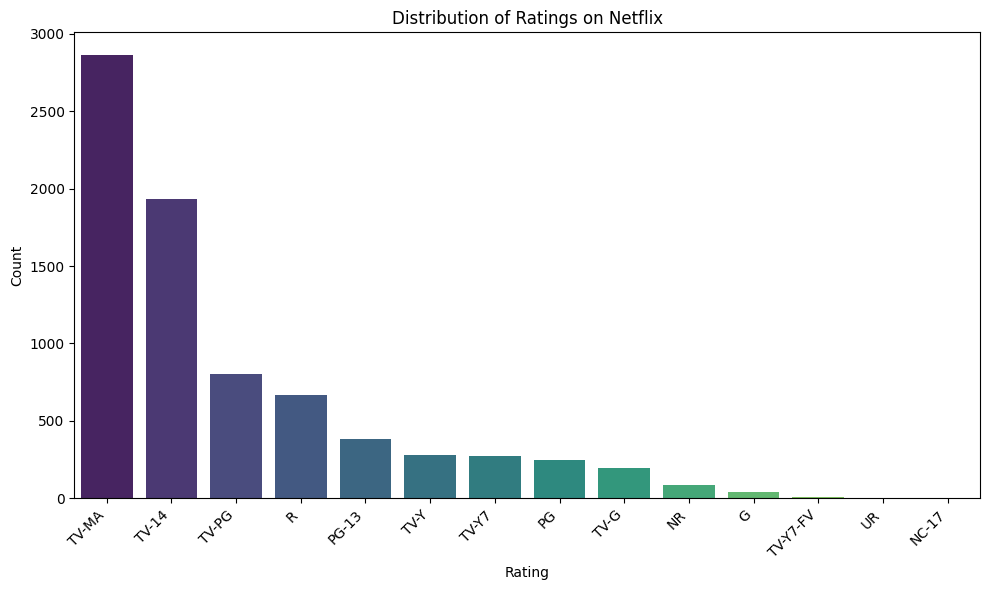

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Rating', order=data['Rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Create separate count plots to compare the distribution of ratings between Movies and TV Shows.



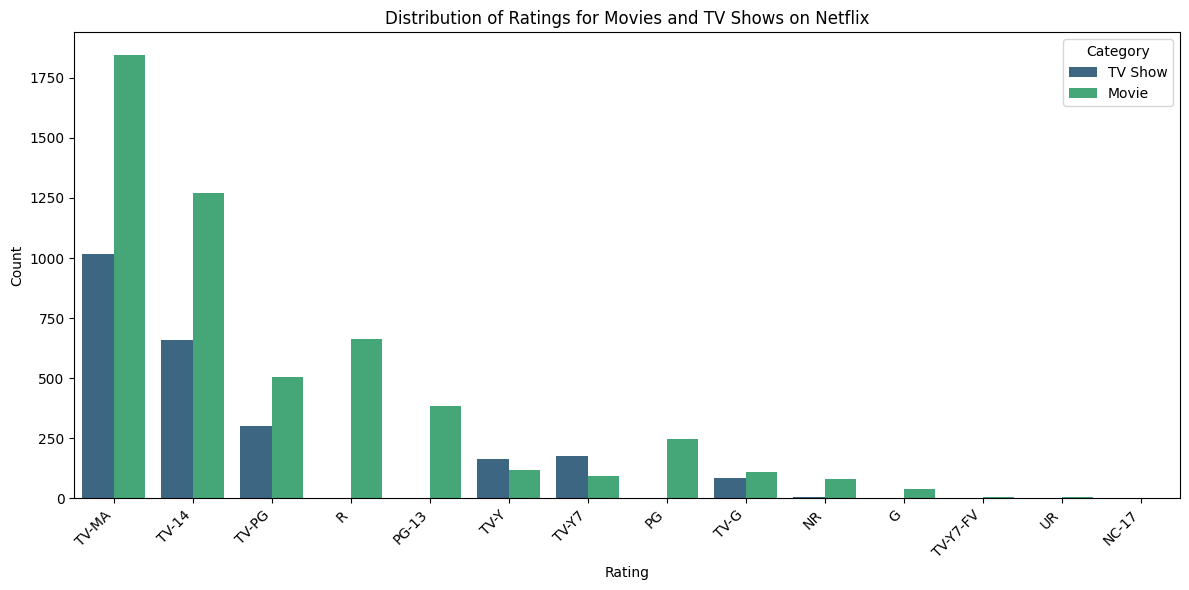

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Rating', hue='Category', order=data['Rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings for Movies and TV Shows on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

**Reasoning**:
For movies, extract the duration in minutes and analyze its distribution using a histogram.



<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1575985181.py:2: SyntaxWarning: invalid escape sequence '\d'
  movies_df['Duration_minutes'] = movies_df['Duration'].str.extract('(\d+)').astype(int)


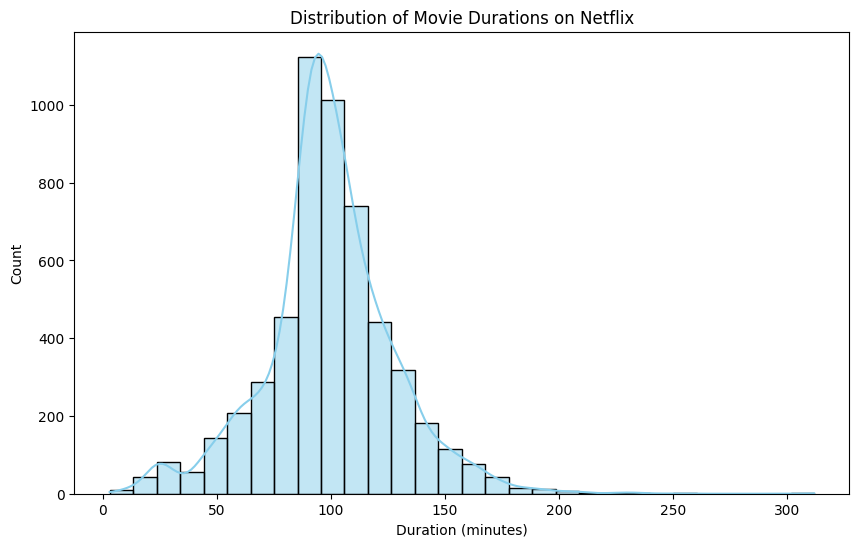

In [36]:
movies_df = data[data['Category'] == 'Movie'].copy()
movies_df['Duration_minutes'] = movies_df['Duration'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(data=movies_df, x='Duration_minutes', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

**Reasoning**:
For TV shows, analyze the distribution of the number of seasons using a count plot.



<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1780476312.py:2: SyntaxWarning: invalid escape sequence '\d'
  tv_shows_df['Seasons'] = tv_shows_df['Duration'].str.extract('(\d+)').astype(int)
/tmp/ipython-input-1780476312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tv_shows_df, x='Seasons', order=tv_shows_df['Seasons'].value_counts().index, palette='viridis')


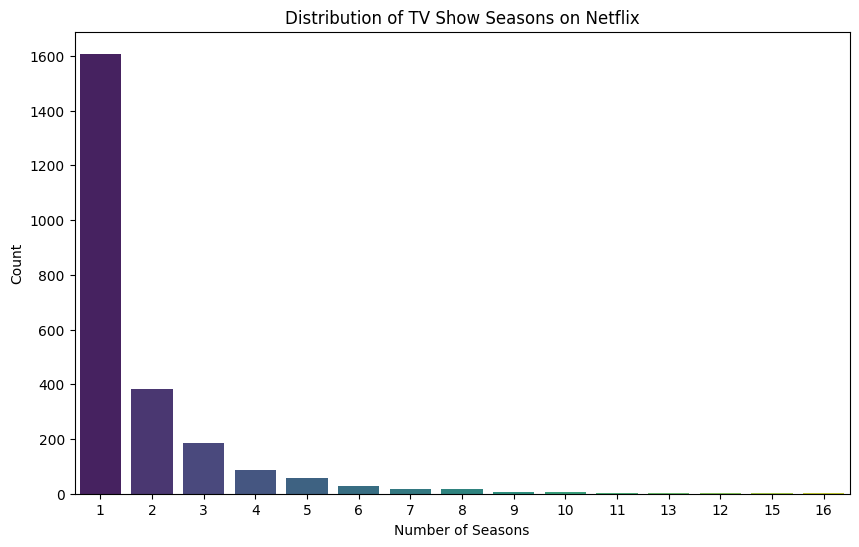

In [37]:
tv_shows_df = data[data['Category'] == 'TV Show'].copy()
tv_shows_df['Seasons'] = tv_shows_df['Duration'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(10, 6))
sns.countplot(data=tv_shows_df, x='Seasons', order=tv_shows_df['Seasons'].value_counts().index, palette='viridis')
plt.title('Distribution of TV Show Seasons on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

## Identify popular directors and cast

### Subtask:
Find the directors and cast members with the most titles on Netflix.


**Reasoning**:
Count the occurrences of each director and cast member and store the top 10 in DataFrames. Then print the top 10 directors and cast members.



In [38]:
top_directors = data['Director'].value_counts().head(10).reset_index()
top_directors.columns = ['Director', 'Count']

data_with_cast = data[data['Cast'] != 'Unknown'].copy()
cast_list = data_with_cast['Cast'].str.split(', ').explode()
top_cast = cast_list.value_counts().head(10).reset_index()
top_cast.columns = ['Cast', 'Count']

print("Top 10 Directors:")
display(top_directors)

print("\nTop 10 Cast Members:")
display(top_cast)

Top 10 Directors:


,Director,Count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Martin Scorsese,12
5,Youssef Chahine,12
6,Jay Chapman,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Hakan Algül,8



Top 10 Cast Members:


,Cast,Count
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,30
3,Om Puri,30
4,Takahiro Sakurai,29
5,Akshay Kumar,29
6,Yuki Kaji,27
7,Paresh Rawal,27
8,Amitabh Bachchan,27
9,Boman Irani,27


## Strategic recommendations

### Subtask:
Based on the analysis, provide insights and strategic recommendations for Netflix's content strategy.


**Reasoning**:
Review the previous analysis findings and synthesize them to identify key trends and patterns, and then formulate strategic recommendations with justifications based on these insights.



## Summary:

### Data Analysis Key Findings

*   Total Netflix releases have significantly increased over the years, with a notable surge in both movies and TV shows, especially TV shows in recent years.
*   The most prevalent genres on Netflix include International Movies, Dramas, Comedies, and International TV Shows.
*   The yearly trends for top genres show varying growth patterns, indicating shifts in content focus over time.
*   The United States and India are the top content-producing countries, with significant contributions to the Netflix library. Other countries also show increasing trends in content production.
*   The dominant ratings are TV-MA and TV-14. TV shows tend to have TV-MA ratings, while movies have a broader distribution including R and PG-13.
*   Most TV shows on Netflix have only one season.
*   'Unknown' is the most frequent 'Director', highlighting missing data. Raúl Campos and Jan Suter are the top named directors. Anupam Kher is the top cast member.

### Insights or Next Steps

*   Invest in more multi-season TV shows, particularly in popular genres like International TV Shows, Dramas, and Comedies, to build long-term engaging series.
*   Continue to expand content production in top countries like the United States and India and explore investment in emerging content hubs to diversify the library and appeal to a global audience.


## Netflix Content Trends Analysis

### Data Analysis Key Findings

*   Total Netflix releases have significantly increased over the years, with a notable surge in both movies and TV shows, especially TV shows in recent years.
*   The most prevalent genres on Netflix include International Movies, Dramas, Comedies, and International TV Shows.
*   The yearly trends for top genres show varying growth patterns, indicating shifts in content focus over time.
*   The United States and India are the top content-producing countries, with significant contributions to the Netflix library. Other countries also show increasing trends in content production.
*   The dominant ratings are TV-MA and TV-14. TV shows tend to have TV-MA ratings, while movies have a broader distribution including R and PG-13.
*   Most TV shows on Netflix have only one season.
*   'Unknown' is the most frequent 'Director', highlighting missing data. Raúl Campos and Jan Suter are the top named directors. Anupam Kher is the top cast member.

### Insights or Next Steps

*   Invest in more multi-season TV shows, particularly in popular genres like International TV Shows, Dramas, and Comedies, to build long-term engaging series.
*   Continue to expand content production in top countries like the United States and India and explore investment in emerging content hubs to diversify the library and appeal to a global audience.

## Conclusion

This analysis of the Netflix dataset provides valuable insights into the platform's content trends. We've seen the growth in both movies and TV shows over the years, identified the most popular genres and content-producing countries, and examined the distribution of ratings and durations. These findings can inform Netflix's content strategy, helping them to acquire and produce content that resonates with their global audience and maintains their competitive edge in the streaming market. Further analysis could delve into the relationship between content characteristics and audience engagement, or explore the impact of missing data on the analysis.